## Introduction
The objective is to create a data set $\lbrace(\mathbf{x}_i, y_i)\rbrace_{i=1,\ldots,N}$ that will be regressed with two models,

\begin{align}
\tilde{y}_1(\mathbf{x}) &= \mathbf{\phi}(\mathbf{x}) \mathbf{\alpha} + \epsilon_1 \\
\tilde{y}_2(\mathbf{x}) &= \mathbf{\psi}(\mathbf{x}) \mathbf{\beta} + \epsilon_2,
\end{align}

in such a way that one of the models is very good at regressing the data and the other is very bad.
In the models, $\epsilon$ are uncorrelated and sampled from given distribution distribution.

We choose $\mathbf{\phi}$ as the winning model, hence natural way fo creating outputs values is choosing a arbitrary vector $\mathbf{\alpha}$, and generate data doing

\begin{equation}
y_i = \mathbf{\phi}(\mathbf{x}_i) \mathbf{\alpha}
\end{equation}

(noise could be added here, but the results do not change)

### Null-space method
In this method we choose the model structure, i.e. $\mathbf{\phi}$ and $\mathbf{\psi}$, and we sample the input space randomly to generate the inputs $\mathbf{X} := \lbrace \mathbf{x}_i \rbrace_{i=1,\ldots,N}$.
The target values $\mathbf{y} := \lbrace y_i \rbrace_{i=1,\ldots,N}$ are to be generated to maximize the difference in performance between the two models.

A way to make a model fail is to place the target data into its null-space, or very close to it.
For models like the ones above the null-space refers to the desing matrix (or data matrix, or Vardemonde matrix if the model is polynomial).

Lets say we choose

\begin{align}
\mathbf{\phi}(\mathbf{x}) &= \begin{bmatrix}\phi_0(\mathbf{x}) & \ldots & \phi_{K}(\mathbf{x})\end{bmatrix}\\
\mathbf{\psi}(\mathbf{x}) &= \begin{bmatrix}\psi_0(\mathbf{x}) & \ldots & \psi_{D}(\mathbf{x})\end{bmatrix}\\
\end{align}

and the correspoding data matrices,

\begin{align}
\Phi[\mathbf{X}] &= \begin{bmatrix}
\phi_0(\mathbf{x}_1) & \ldots & \phi_{K}(\mathbf{x}_1)\\
 & \vdots &\\
\phi_0(\mathbf{x}_N) & \ldots & \phi_{K}(\mathbf{x}_N)\\
\end{bmatrix} \in \mathbb{R}^{N \times K}\\
\Psi[\mathbf{X}] &= \begin{bmatrix}
\psi_0(\mathbf{x}_1) & \ldots & \psi_{D}(\mathbf{x}_1)\\
 & \vdots &\\
\psi_0(\mathbf{x}_N) & \ldots & \psi_{D}(\mathbf{x}_N)\\
\end{bmatrix} \in \mathbb{R}^{N \times D}
\end{align}

Then the condition

\begin{equation}
\Psi[\mathbf{X}]^\top \mathbf{y} = \Psi[\mathbf{X}]^\top \Phi[\mathbf{X}] \mathbf{\alpha} \approx \mathbf{0}
\end{equation}

reduces the performance of the second model, $\mathbf{\psi}$, when regressing the data.


#### Derivation
We start by computing the residuals of the $\mathbf{\psi}$ model, i.e.

\begin{align}
r_i &:= y_i - \tilde{y}(\mathbf{x}_i) = y_i - \mathbf{\psi}(\mathbf{x}_i) \mathbf{\beta} + \epsilon_i,\; \text{i.e.}\\
\mathbf{r} &:= \mathbf{y} - \Psi \mathbf{\beta} + \mathbf{\epsilon}
\end{align}
(we have ommitted the argments of $\Psi$)

If we consider the square norm of the residuals, $\Vert \mathbf{z} \Vert^2 := \left\langle z, z\right\rangle$ (where $\left\langle \cdot , \cdot\right\rangle$ is a scalar product), as an indicator for the quality of the regression (that is we will do least squares) we get that

\begin{align}
\Vert \mathbf{r} \Vert^2 = &\left\langle \mathbf{y} - \Psi \mathbf{\beta} + \mathbf{\epsilon}, \mathbf{y} - \Psi \mathbf{\beta} + \mathbf{\epsilon}\right\rangle = \Vert \mathbf{y} \Vert^2 + \Vert \Psi \mathbf{\beta} \Vert^2 + \Vert \mathbf{\epsilon} \Vert^2 - 2 \left\langle \Psi \mathbf{\beta}, \mathbf{y} \right\rangle + 2 \left\langle \mathbf{y}, \mathbf{\epsilon} \right\rangle - 2 \left\langle \Psi \mathbf{\beta}, \mathbf{\epsilon} \right\rangle \simeq \\
\simeq & \Vert \mathbf{y} \Vert^2 + \Vert \Psi \mathbf{\beta} \Vert^2 + \Vert \mathbf{\epsilon} \Vert^2 - 2 \left\langle \Psi \mathbf{\beta}, \mathbf{y} \right\rangle
\end{align}

Where we used that all the terms involving $\left\langle \cdot, \mathbf{\epsilon}\right\rangle$ vanish, that is a scalar product against an $N$-dimensional random vector is likely to be very small, because sampling random vectors in high dimensions almost always gives you orthogonal vectors.
In probabilistic jargon, one would say that the noise and the model outputs are conditionally independent.

When the $\mathbf{\psi}$ model is fitted to the data, it will try to reduce the norm of the residuals.
Since the norm of the targets $\Vert y \Vert^2$ is given and the model cannot affect it (same goes for the noise), the coefficients vector $\mathbf{\beta}$ choosen by the regression is

\begin{equation}
\mathbf{\beta} = \operatorname{arg\,min}_{\mathbf{b}} \Vert \Psi \mathbf{b} \Vert^2 - 2 \left\langle \Psi \mathbf{b}, \mathbf{y} \right\rangle
\end{equation}

The first term says that the regression is minimizing the norm of the coefficients vector, and the second one says that it is trying to put the output of the model parallel to the given targets.
Lets look at this second term that the regression is maximizing

\begin{equation}
\left\langle \Psi \mathbf{b}, \mathbf{y} \right\rangle = \left\langle \Psi \mathbf{b}, \Phi \mathbf{\alpha}\right\rangle =  \left\langle \mathbf{b}, \Psi^\top \Phi \mathbf{\alpha}\right\rangle 
%= \Vert\mathbf{b}\Vert\Vert\mathbf{\alpha}\Vert\left\langle \hat{\mathbf{b}}, \Psi^\top \Phi \hat{\mathbf{\alpha}}\right\rangle
\end{equation}

Hence if we choose $\mathbf{\alpha}$ such that $\Psi^\top \Phi \mathbf{\alpha} \approx 0$, i.e. $\mathbf{y}$ in the null-space of $\Psi^\top$, the regression using the $\mathbf{\psi}$ model will be bad.

The former can be seen if we use the Moore–Penrose pseudoinverse to solve the problem.
Assume that $N \gg D$ (i.e. we have more samples than coefficients in the model) and that the choosen features are linearly independent (e.g. polynomials), or equivalently that the columns of the data matrix $\Psi$ are linearly independet (i.e. this matrix is full column rank).
This also implies that $\Psi$ has a non-empty null-space, its dimension being $N - D$.
Under these assumptions the pseudoinverse $\Psi^+$ and the regression coefficints are

\begin{align}
\Psi^+ &:= \left(\Psi^\top \Psi\right)^{-1} \Psi^\top\\
\mathbf{\beta} &= \Psi^+  \mathbf{y} = \Psi^+ \Phi \mathbf{\alpha} = \left(\Psi^\top \Psi\right)^{-1} \Psi^\top \Phi \mathbf{\alpha} \approx \mathbf{0}
\end{align}

where we have used the condition of the null-space in the last step.

## Example: 1D polynomial models

In [120]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import null_space

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data
N = 200                            # number of samples
X = 2 * np.random.rand(N, 1) - 1   # samples in (-1,1)

## Phi model
phi = lambda x: x ** range(5)      # 5th degree polynomial model
Phi = phi(X)
K = Phi.shape[1]                   # number of columns in Phi data matrix

## Psi model
psi_exp = [0]+list(range(5,10))
psi = lambda x: x ** psi_exp       # high degree polynomial missing some degrees, the monomials must not overlap with phi!
Psi = psi(X)
D = Psi.shape[1]                   # number of columns in Psi data matrix
Npsi = null_space(Psi.T)           # null-space of transposed Psi data matrix  
nD = N - D                         # dimension of the null-space
assert(nD == Npsi.shape[1])

## Adversarial data for Psi
wNull = Npsi.dot(2 * np.random.rand(nD,1).reshape(-1,1) - 1) # vector in the null-space of Psi
alpha = LinearRegression().fit(Phi, wNull).coef_             # coefficients to generate data
y = Phi.dot(alpha.reshape(-1,1))                             # targets
# normalize data to make it comparable with non-adversarial
ynorm = np.sqrt(np.mean(y**2))
y = y / ynorm
alpha = alpha / ynorm
print (np.sqrt(np.mean(Psi.T.dot(y)**2)))

## Non-adversarial data from Phi
alphana = 2 * np.random.rand(K,1).reshape(-1,1) - 1
yna = Phi.dot(alphana)
# normalize data to make it comparable with adversarial
ynanorm = np.sqrt(np.mean(yna**2))
yna = yna / ynanorm
alphana = alphana / ynanorm

proj = Psi.T.dot(yna)
print (proj.T.dot(proj))

## Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)
Xna_train, Xna_test, yna_train, yna_test = train_test_split(X, yna, test_size=100)

Psireg = LinearRegression(fit_intercept=False).fit(psi(X_train), y_train)
yPsi = Psireg.predict(psi(X_test))
Phireg = LinearRegression(fit_intercept=False).fit(phi(X_train), y_train)
yPhi = Phireg.predict(phi(X_test))

print('** R^2 (adversarial): Phi {:.2f}  Psi {:.2f}'.format(
        Phireg.score(phi(X_train), y_train), Psireg.score(psi(X_train), y_train)))

Psiregna = LinearRegression(fit_intercept=False).fit(psi(Xna_train), yna_train)
yPsina = Psiregna.predict(psi(Xna_test))
Phiregna = LinearRegression(fit_intercept=False).fit(phi(Xna_train), yna_train)
yPhina = Phiregna.predict(phi(Xna_test))

print('** R^2 (non-adversarial): Phi {:.2f}  Psi {:.2f}'.format(
        Phiregna.score(phi(Xna_train), yna_train), Psiregna.score(psi(Xna_train), yna_train)))



15.666431692728116
[[34166.55479083]]
** R^2 (adversarial): Phi 1.00  Psi 0.61
** R^2 (non-adversarial): Phi 1.00  Psi 0.98


** Test error (adversarial): Phi 4.894E-30  Psi 4.519E-01
** Coefficients
  alpha:  0.000E+00 -4.192E+00 -1.922E+00  5.501E+00  2.040E+00
  beta:  -8.587E-02 -4.740E+01 -2.649E+00  1.074E+02  2.789E+00 -5.931E+01


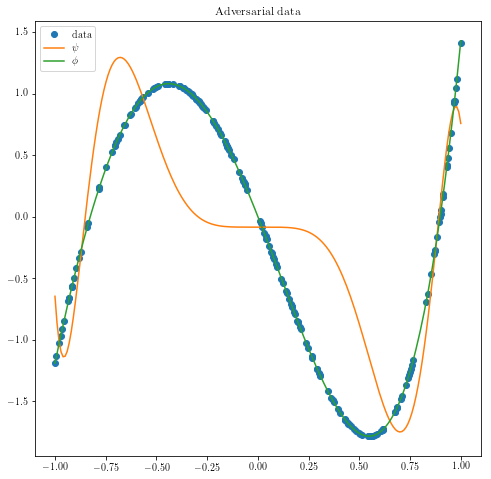

In [121]:
print('** Test error (adversarial): Phi {:.3E}  Psi {:.3E}'.format(
        mean_squared_error(y_test,yPhi), mean_squared_error(y_test,yPsi)))

print('** Coefficients')
print('  alpha:', ' '.join(['{:>10.3E}'.format(a) for a in alpha.flatten()]))
print('  beta: ', ' '.join(['{:>10.3E}'.format(b) for b in Psireg.coef_.flatten()]))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure(1)
plt.clf()
plt.plot(X, y,'o', label='data');
x_ = np.linspace(-1,1,200).reshape(-1,1)
plt.plot(x_, Psireg.predict(psi(x_)),'-', label=r"$\psi$");
plt.plot(x_, Phireg.predict(phi(x_)),'-', label=r"$\phi$");
plt.legend();
plt.title('Adversarial data');

** Test error (non-adversarial): Phi 1.629E-31  Psi 5.256E-03
** Coefficients
  alpha: -4.237E-01 -1.561E-01 -7.318E-01 -1.878E-01 -8.861E-01
  beta:  -5.081E-01 -3.738E+00 -5.588E+00  6.624E+00  4.177E+00 -3.211E+00


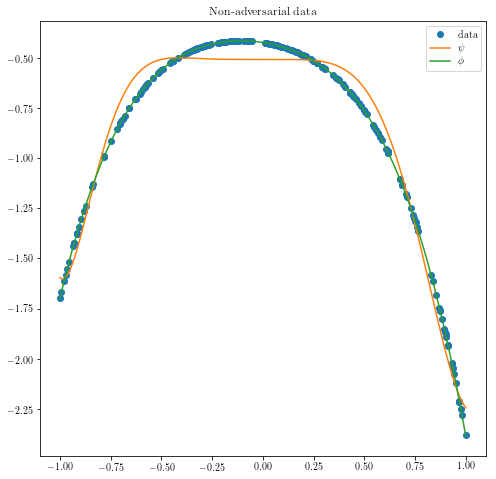

In [122]:
print('** Test error (non-adversarial): Phi {:.3E}  Psi {:.3E}'.format(
        mean_squared_error(yna_test,yPhina), mean_squared_error(yna_test,yPsina)))
print('** Coefficients')
print('  alpha:', ' '.join(['{:>10.3E}'.format(a) for a in alphana.flatten()]))
print('  beta: ', ' '.join(['{:>10.3E}'.format(b) for b in Psiregna.coef_.flatten()]))

plt.figure(2)
plt.clf()
plt.plot(X, yna,'o', label='data');
plt.plot(x_, Psiregna.predict(psi(x_)),'-', label=r"$\psi$");
plt.plot(x_, Phiregna.predict(phi(x_)),'-', label=r"$\phi$");
plt.legend();
plt.title('Non-adversarial data');